# **Project 2: Vehicle Sales and Market Trends**

## **Executive Summary**

### **Key Findings:**

  * **Vehicle Condition:** A primary driver of selling price, with higher-condition vehicles commanding premium prices.
  
  * **Mileage:** Generally negatively impacts selling price, but the effect varies by condition and body type.

  * **Body Type:** The relationship between condition and price differs across body types.
  
  * **Popular Makes and Models:**

    * **Overall Sales Trends:** All listed models exhibited consistent growth, indicating a growing market.

    * **Specific Model Performance:**
      * Ford vehicles dominated the **top 10.**
      * The Toyota Camry maintained its position.
      * Japanese brands were well-represented.
      * The BMW 3 Series showed steady growth.

  * **Potential Factors Influencing Sales:** Economic conditions, new model releases, marketing, and consumer preferences likely played a role.

  * **MMR Analysis:** Certain makes and models were consistently overestimated or underestimated by MMR. Further analysis is needed to understand these discrepancies.

### **Deliverables:**

  * **Jupyter Notebook:** Detailed analysis, code, and visualizations.
  
  * **Presentation:** Summarizes key findings.

### **Further Analysis:**

  * Market research, competitive analysis, and economic indicators can provide deeper insights into sales trends.

### **Business task:** Analyze the dataset to uncover market trends, understand pricing dynamics, and explore factors influencing vehicle sales.

 **1. Identifying Trends in Vehicle Sales Over Time**

 **2. Analyzing the Impact of Vehicle Condition and Mileage on Selling Prices**

 **3. Understanding the Relationship Between MMR Values and Actual Selling Prices**

 **4. Determining the Most Popular Vehicle Makes and Models**


In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

df= pd.read_csv('car_prices_cleaned.csv')

In [3]:
# Confirm dataset has loaded

df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saletime
0,2015,Kia,Sorento,LX,Suv,Automatic,5XYKTCA69FG566472,CA,5.0,16639.0,White,Black,Kia Motors America Inc,20500.0,21500.0,Dec 16 2014,12:30:00
1,2015,Kia,Sorento,LX,Suv,Automatic,5XYKTCA69FG561319,CA,5.0,9393.0,White,Beige,Kia Motors America Inc,20800.0,21500.0,Dec 16 2014,12:30:00
2,2014,Bmw,3 Series,328i SULEV,Sedan,Automatic,WBA3C1C51EK116351,CA,45.0,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900.0,30000.0,Jan 15 2015,04:30:00


In [4]:
# Confirm data set details

print(df.info())
print('\nRows and Cols\n')
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')
print('\nVehicle Numerical Summary Statistics\n')
print(df.describe().transpose())
print('\nVehicle Categorical Summary Statistics\n')
print(df.describe(include='object').transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558836 entries, 0 to 558835
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558836 non-null  int64  
 1   make          548535 non-null  object 
 2   model         548437 non-null  object 
 3   trim          548185 non-null  object 
 4   body          545641 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558832 non-null  object 
 7   state         558836 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558742 non-null  float64
 10  color         558087 non-null  object 
 11  interior      558087 non-null  object 
 12  seller        558836 non-null  object 
 13  mmr           558798 non-null  float64
 14  sellingprice  558824 non-null  float64
 15  saledate      558824 non-null  object 
 16  saletime      558824 non-null  object 
dtypes: float64(4), int64(1), object(12)
memory usage

## **1. Identifying Trends in Vehicle Sales Over Time**
### **Research Questions:**
  * Which makes and models produced the highest sales over the past year?
  * Which makes and models produced the least?
  * How have sales volumes for different vehicle segments (e.g., SUVs, sedans, trucks) changed over the past year?
  * What is the percentage increase or decrease in sales for each segment compared to the previous year?



### **Which makes and models produced the highest sales over the past year?**

In [5]:
# Check column names

df. columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'saletime'],
      dtype='object')

In [6]:
# Check for missing values

df.isna().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11819
odometer,94


In [7]:
# Drop all missing values

df = df.dropna()

In [8]:
# Confirm all missing values have been dropped

df.isna().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [9]:
# 472325 out of 558836 rows remain, a loss of approx. 15% of data
# However, the due to the size of the dataset this loss show not be detrimental

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558835
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
 16  saletime      472325 non-null  object 
dtypes: float64(4), int64(1), object(12)
memory usage: 64.

In [10]:
# Confirming no missing years (1982 - 2015)

df['year'].value_counts().sort_index()

,count
year,
1990,33
1991,51
1992,97
1993,127
1994,286
1995,483
1996,562
1997,1042
1998,1464


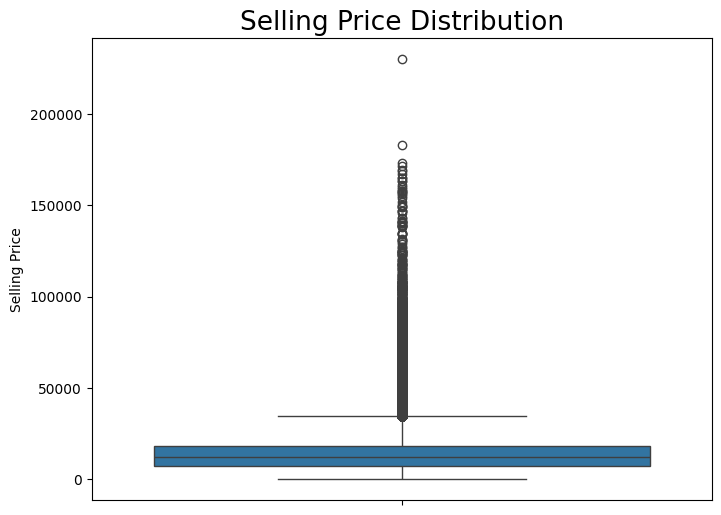

In [11]:
# Check for outliers in sellingprice variable

plt.figure(figsize=(8,6))
sns.boxplot(df.sellingprice)
plt.title('Selling Price Distribution', fontsize=19)
plt.ylabel('Selling Price')
plt.show()

In [12]:
# Confirming outliers based on make/model
# Outlier: Ford Escape Selling Price $230,000.00; this value will be noted, but dropped from the data set for further investigation

df.groupby(['make', 'model'])['sellingprice'].max().sort_values(ascending=False).head()

,,sellingprice
make,model,
Ford,Escape,230000.0
Ferrari,458 Italia,183000.0
Mercedes-Benz,S-Class,173000.0
Rolls-Royce,Ghost,171500.0
Bmw,I8,165000.0


In [13]:
# Confirming outliers against MMR
# Ford Escape MMR $35,100

df.groupby(['make', 'model'])['mmr'].max().sort_values(ascending=False).tail(566)

,,mmr
make,model,
Ford,Escape,35100.0
Gmc,Yukon Hybrid,35100.0
Ford,Focus,35100.0
Lexus,Is 250,35000.0
Mercedes-Benz,Gla-Class,35000.0
...,...,...
Oldsmobile,Achieva,325.0
Geo,Metro,300.0
Suzuki,Esteem,275.0


In [14]:
# Removing selling price outlier

filtered_df = df.loc[df['sellingprice'] <= 200000]

# Confirming outlier is removed

filtered_df['sellingprice'].sort_values(ascending=False).head()

,sellingprice
548168,183000.0
446948,173000.0
545522,171500.0
125094,169500.0
557569,169000.0


In [15]:
# There are also outliers in Odometer

filtered_df['odometer'].describe()

,odometer
count,472324.000000
mean,66701.814399
std,51939.611036
min,1.000000
25%,28137.000000
50%,51085.000000
75%,96590.000000
max,999999.000000


In [16]:
# Removing outliers from Odometer feature

filtered_df = filtered_df[filtered_df['odometer'] < 250000]

# Confirming outliers are removed

filtered_df['odometer'].describe()

,odometer
count,470280.000000
mean,65651.727945
std,48815.711183
min,1.000000
25%,28046.000000
50%,50778.000000
75%,95912.250000
max,249975.000000


In [17]:
# Convert 'saledate' to datetime format

filtered_df['saledate'] = pd.to_datetime(filtered_df['saledate'])


In [18]:
# Confirm saledate is in datetime format

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470280 entries, 0 to 558835
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          470280 non-null  int64         
 1   make          470280 non-null  object        
 2   model         470280 non-null  object        
 3   trim          470280 non-null  object        
 4   body          470280 non-null  object        
 5   transmission  470280 non-null  object        
 6   vin           470280 non-null  object        
 7   state         470280 non-null  object        
 8   condition     470280 non-null  float64       
 9   odometer      470280 non-null  float64       
 10  color         470280 non-null  object        
 11  interior      470280 non-null  object        
 12  seller        470280 non-null  object        
 13  mmr           470280 non-null  float64       
 14  sellingprice  470280 non-null  float64       
 15  saledate      470280 n

In [19]:
# Create sale year feature

filtered_df['saledate'] = pd.to_datetime(filtered_df['saledate'], format='%Y-%m-%d', errors='coerce')
filtered_df['saleyear'] = filtered_df['saledate'].dt.year
#filtered_df['saleyear'] = pd.to_datetime(filtered_df['saleyear'])

In [20]:
# Confirm feature creation

filtered_df['saleyear'].info()

<class 'pandas.core.series.Series'>
Index: 470280 entries, 0 to 558835
Series name: saleyear
Non-Null Count   Dtype
--------------   -----
470280 non-null  int32
dtypes: int32(1)
memory usage: 5.4 MB


In [21]:
# Group by Sale Year, Make and Mean, Max, and Min Selling Price

mean_sales_trends = filtered_df.groupby(['saleyear', 'make'])['sellingprice'].mean().reset_index().sort_values(by='sellingprice')
max_sales_trends = filtered_df.groupby(['saleyear', 'make'])['sellingprice'].max().reset_index().sort_values(by='sellingprice')
min_sales_trends = filtered_df.groupby(['saleyear', 'make'])['sellingprice'].min().reset_index().sort_values(by='sellingprice')

In [22]:
# Ensure Selling Prices are not in Scientific Notation

pd.options.display.float_format = '{:.2f}'.format

# Print each of these Sales Trends

print(f'\nMax Sales Trends \n{max_sales_trends}')
print(f'Mean Sales Trends \n{mean_sales_trends}')
print(f'\nMin Sales Trends \n{min_sales_trends}')


Max Sales Trends 
    saleyear           make  sellingprice
32      2014       Plymouth        450.00
56      2015         Daewoo        600.00
62      2015            Geo       1600.00
17      2014          Isuzu       2000.00
31      2014     Oldsmobile       4400.00
..       ...            ...           ...
50      2015        Bentley     163000.00
51      2015            Bmw     165000.00
89      2015    Rolls-Royce     171500.00
79      2015  Mercedes-Benz     173000.00
58      2015        Ferrari     183000.00

[100 rows x 3 columns]
Mean Sales Trends 
    saleyear         make  sellingprice
56      2015       Daewoo        450.00
32      2014     Plymouth        450.00
62      2015          Geo        585.00
84      2015   Oldsmobile        949.48
17      2014        Isuzu       1058.33
..       ...          ...           ...
72      2015  Lamborghini     111500.00
58      2015      Ferrari     125464.29
9       2014      Ferrari     144666.67
36      2014  Rolls-Royce     1498

In [23]:
mean_sales_pivot = mean_sales_trends.pivot(index='saleyear', columns='make', values='sellingprice')
max_sales_pivot = max_sales_trends.pivot(index='saleyear', columns='make', values='sellingprice')
min_sales_pivot = min_sales_trends.pivot(index='saleyear', columns='make', values='sellingprice')

print(f'Mean Sales Pivot\n{mean_sales_pivot}')
print(f'\nMax Sales Pivot\n{max_sales_pivot}')
print(f'\nMin Sales Pivot\n{min_sales_pivot}')


Mean Sales Pivot
make        Acura  Aston Martin     Audi  Bentley      Bmw    Buick  Cadillac  \
saleyear                                                                        
2014     14503.23           NaN 19136.61 66055.88 21056.08  8736.52  12896.75   
2015     13075.97      55500.00 20095.52 73999.43 21343.35 10778.33  14941.88   

make      Chevrolet  Chrysler  Daewoo  ...    Saab  Saturn    Scion   Smart  \
saleyear                               ...                                    
2014       10338.24   8324.20     NaN  ... 3987.18 3562.60 10609.68 6567.31   
2015       12063.65  10842.21  450.00  ... 3586.57 3436.68  9655.91 6279.81   

make       Subaru  Suzuki    Tesla   Toyota  Volkswagen    Volvo  
saleyear                                                          
2014     13206.94 4056.84 80000.00 12229.55     8247.36  9945.83  
2015     15752.77 4008.45 66465.91 12544.28     9467.44 11059.38  

[2 rows x 53 columns]

Max Sales Pivot
make        Acura  Aston Martin  

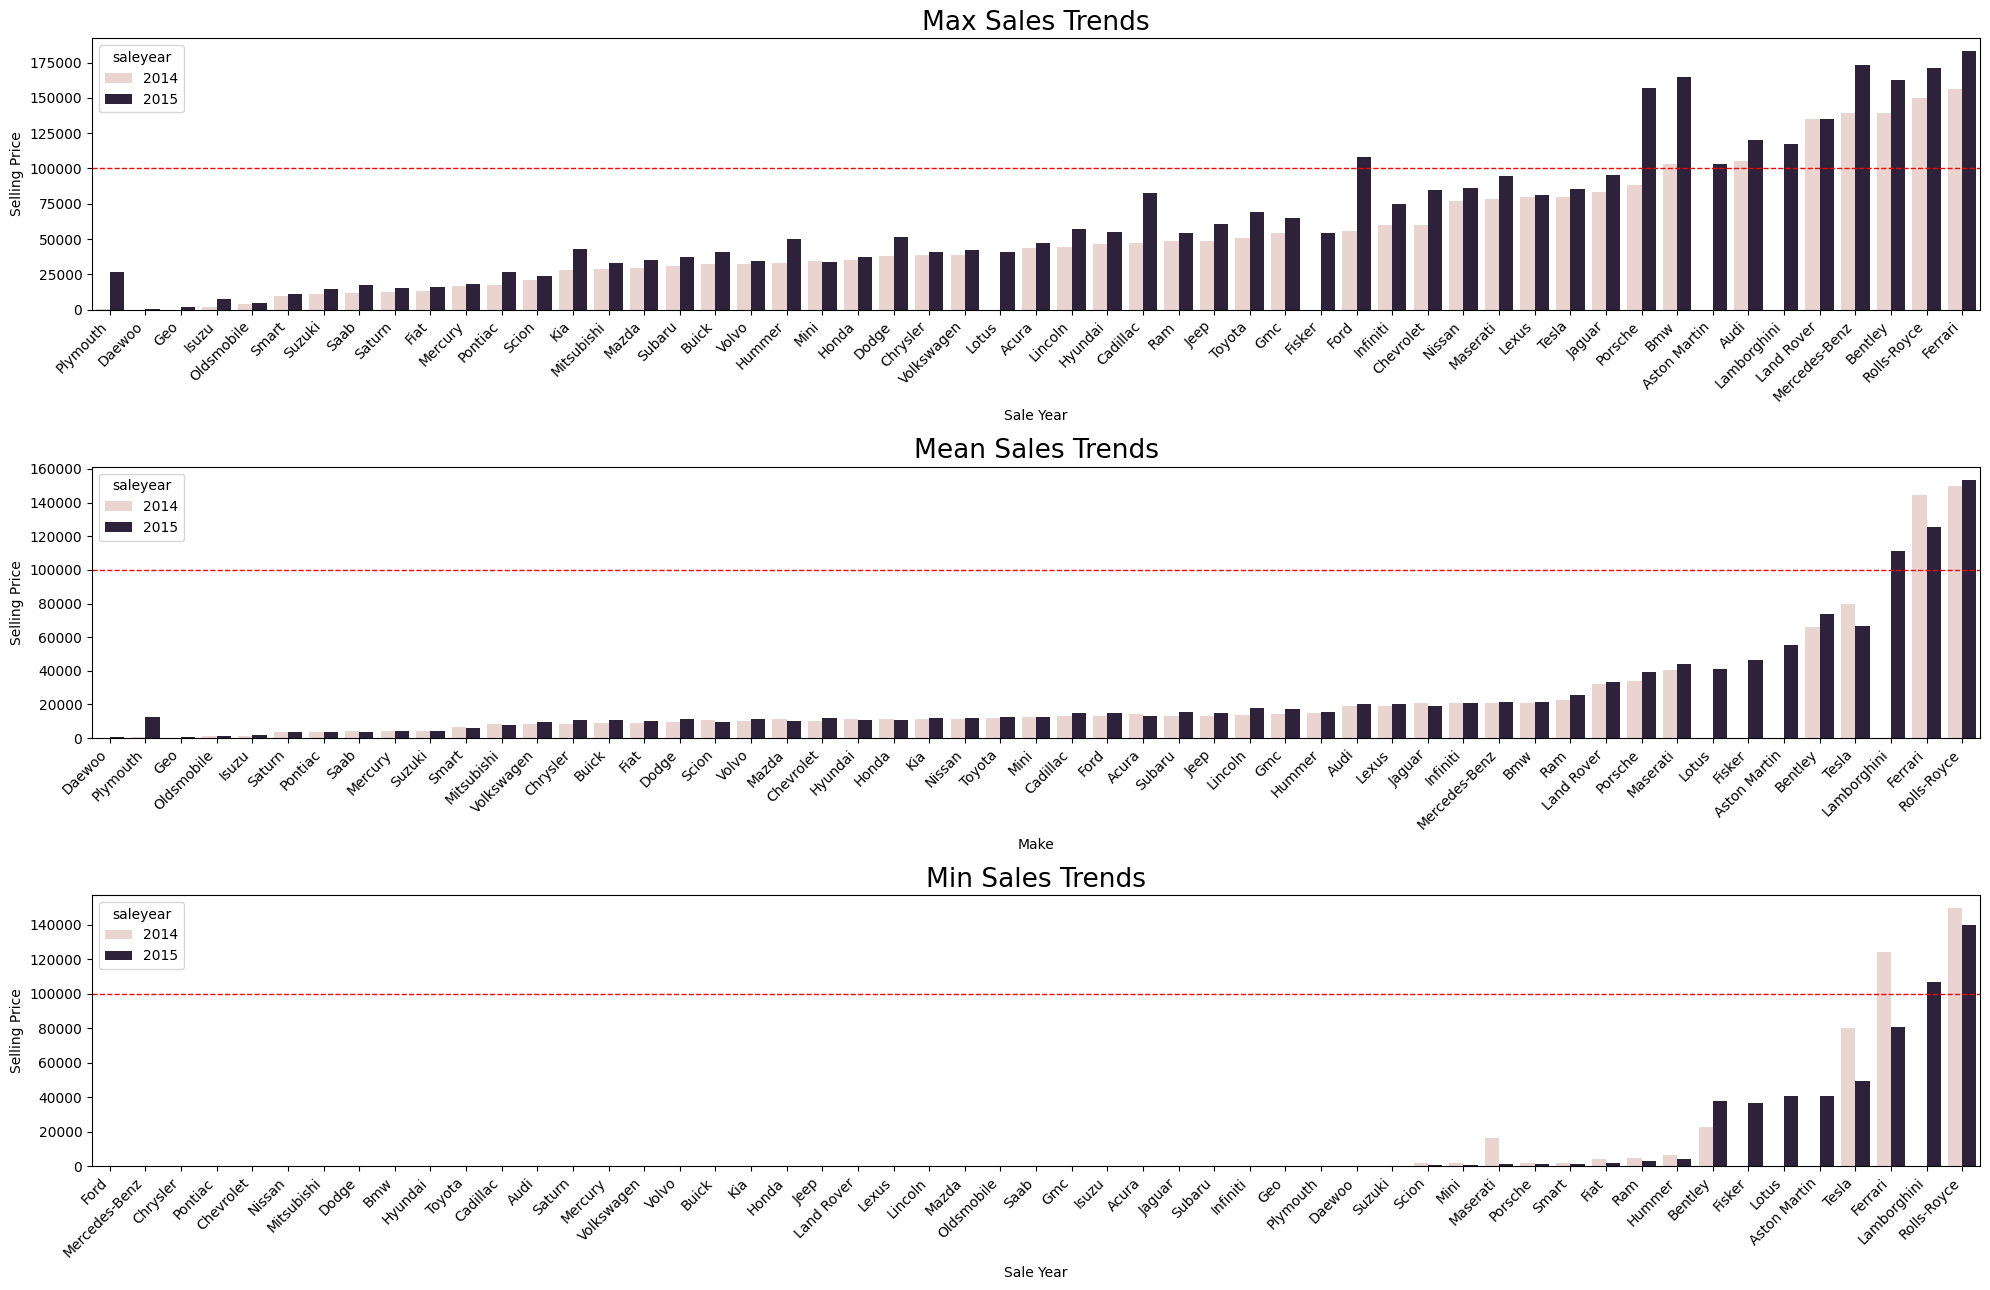

In [24]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 13))

# Plot mean sales trends
sns.barplot(x='make', y='sellingprice', hue='saleyear', data=mean_sales_trends, ax=axes[1])
axes[1].set_title('Mean Sales Trends', fontsize=19)
axes[1].set_xlabel('Make')  # Corrected label
axes[1].set_ylabel('Selling Price')
axes[1].axhline(y=100000, color='red', linestyle='dashed', linewidth=1)
# Rotate x-axis labels for all subplots efficiently
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')  # Right-aligned for better readability

# Plot max sales trends
sns.barplot(x='make', y='sellingprice', hue='saleyear', data=max_sales_trends, ax=axes[0])
axes[0].set_title('Max Sales Trends', fontsize=19)
axes[0].set_xlabel('Sale Year')
axes[0].set_ylabel('Selling Price')
axes[0].axhline(y=100000, color='red', linestyle='dashed', linewidth=1)

# Plot min sales trends
sns.barplot(x='make', y='sellingprice', hue='saleyear', data=min_sales_trends, ax=axes[2])
axes[2].set_title('Min Sales Trends', fontsize=19)
axes[2].set_xlabel('Sale Year')
axes[2].set_ylabel('Selling Price')
axes[2].axhline(y=100000, color='red', linestyle='dashed', linewidth=1)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
# 1. Filter data for the past year
df_last_year = filtered_df[filtered_df['saleyear'] == filtered_df['saleyear'].max()]

# 2. Group by make and model and calculate total sales
sales_by_make_model = df_last_year.groupby(['make', 'model'])['sellingprice'].sum()

# 3. Find the highest sales
highest_sales = sales_by_make_model.idxmax()

# 4. Print the result
print(f"Make and model with the highest sales: {highest_sales}")

# Optional: Display the top N makes and models with highest sales
top_n = 5
print(sales_by_make_model.nlargest(top_n))

Make and model with the highest sales: ('Ford', 'F-150')
make      model  
Ford      F-150     221719383.00
Nissan    Altima    171669746.00
Ford      Escape    142905611.00
          Fusion    142303320.00
Infiniti  G Sedan   127608822.00
Name: sellingprice, dtype: float64


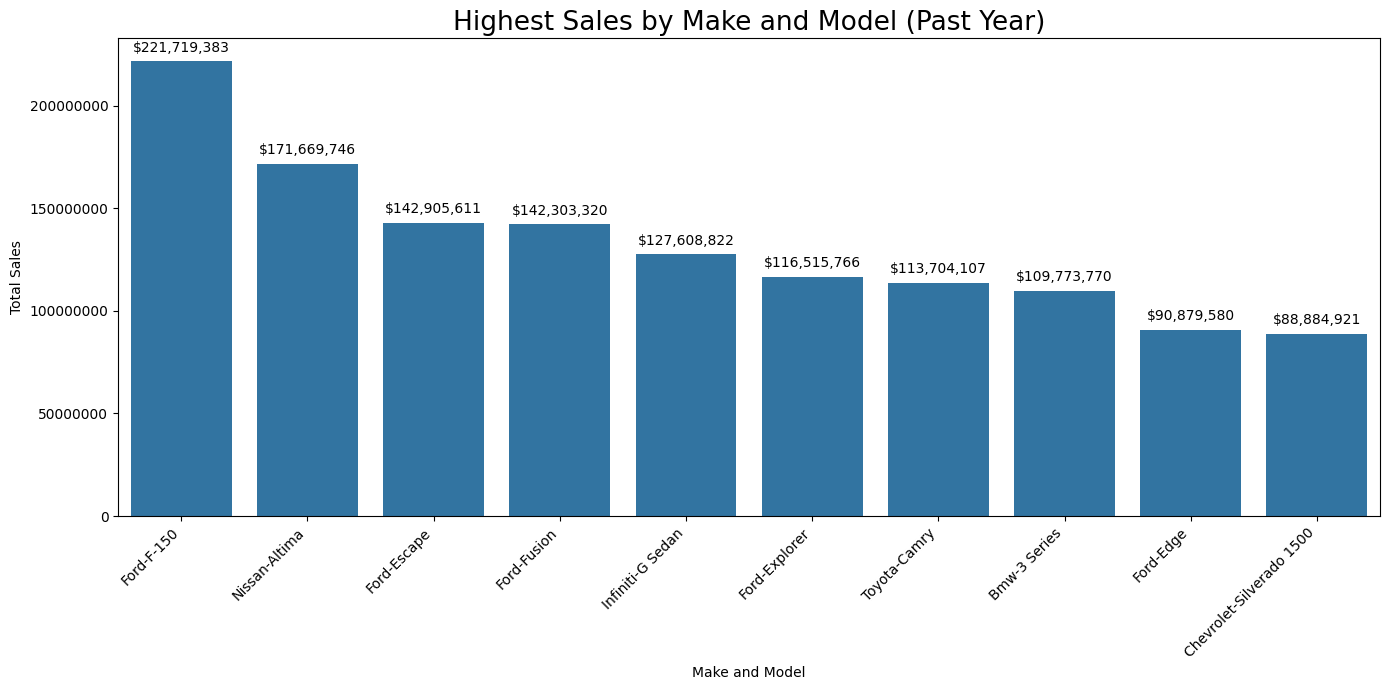

In [26]:
data = sales_by_make_model.sort_values(ascending=False).head(10)

# Extract make and model combinations for the top 10
x = data.index.map('{0[0]}-{0[1]}'.format)  # Access levels of MultiIndex

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=x, y=data.values)
plt.title('Highest Sales by Make and Model (Past Year)', fontsize=19)
plt.xlabel('Make and Model')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, horizontalalignment='right')  # Rotate x-axis labels for readability
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation on x-axis

# Add actual prices as text above each bar
for i, v in enumerate(data.values):
    ax.text(i, v + 10000000, f"${v:,.0f}", ha='center', va='top')

plt.tight_layout()
plt.show()

### **Which makes and models produced the least?**

In [27]:
# 3. Find the lowest sales
lowest_sales = sales_by_make_model.idxmin()

# 4. Print the result
print(f"Make and model with the lowest sales: {lowest_sales}")

# Optional: Display the bottom N makes and models with lowest sales
bottom_n = 5
print(sales_by_make_model.nsmallest(bottom_n))

Make and model with the lowest sales: ('Buick', 'Roadmaster')
make        model        
Buick       Roadmaster      250.00
Chevrolet   Corsica         350.00
Geo         Metro           400.00
Honda       Civic Del Sol   450.00
Oldsmobile  Achieva         500.00
Name: sellingprice, dtype: float64


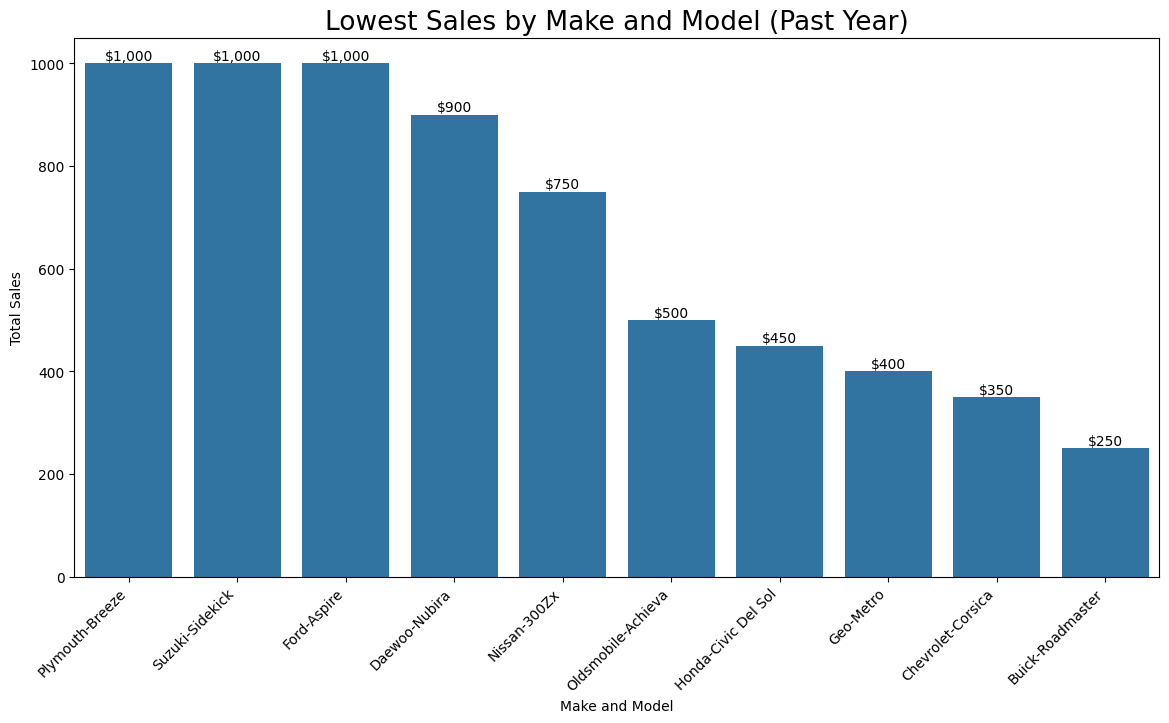

In [28]:
%matplotlib inline
#import matplotlib.pyplot as plt
#import seaborn as sns

data = sales_by_make_model.sort_values(ascending=False).tail(10)

# Extract make and model combinations for the top 10
x = data.index.map('{0[0]}-{0[1]}'.format)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=x, y=data.values)
plt.title('Lowest Sales by Make and Model (Past Year)', fontsize=19)
plt.xlabel('Make and Model')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, horizontalalignment='right')  # Rotate x-axis labels for readability
plt.ticklabel_format(style='plain', axis='y')

# Add actual prices as text above each bar
# Reduced the added height for the text position to avoid enlarging the image
for i, v in enumerate(data.values):
    ax.text(i, v, f"${v:,.0f}", ha='center', va='bottom')

#plt.subplots_adjust(top=0.9)  # Adjust top margin
plt.show()

### **How have sales volumes for different vehicle segments (e.g., SUVs, 	sedans, trucks) changed over the past year?**

In [29]:
filtered_df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'saletime', 'saleyear'],
      dtype='object')

In [30]:
filtered_df['body'].value_counts().sort_values(ascending=False).head(25)

,count
body,
Sedan,210593
Suv,120496
Hatchback,23781
Minivan,21804
Coupe,15883
Wagon,14189
Crew Cab,14130
Convertible,9310
Supercrew,7541


In [31]:

# Define a function to categorize the car bodies
def categorize_car_body(car_body):
    if 'Sedan' in car_body or 'Coupe' in car_body:
        return 'Sedan/Coupe'
    elif 'SUV' in car_body or 'Crew' in car_body or 'Super' in car_body or 'Regular' in car_body or 'Extended' in car_body or 'Quad' in car_body or 'King' in car_body or 'Access' in car_body:
        return 'SUV/Truck'
    elif 'Hatchback' in car_body or 'Convertible' in car_body:
        return 'Hatchback/Convertible'
    elif 'Minivan' in car_body or 'Van' in car_body:
        return 'Minivan/Van'
    else:
        return 'Other'

# Apply the categorization function to the DataFrame
filtered_df['body_cat'] = filtered_df['body'].apply(categorize_car_body)

print(filtered_df)

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        Suv   
1       2015     Kia              Sorento           LX        Suv   
2       2014     Bmw             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     Bmw  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558830  2011     Bmw             5 Series         528i      Sedan   
558832  2012     Ram                 2500  Power Wagon   Crew Cab   
558833  2012     Bmw                   X5    xDrive35d        Suv   
558834  2015  Nissan               Altima        2.5 S      Sedan   
558835  2014    Ford                F-150          XLT  Supercrew   

       transmission                vin state  condition  odometer  color  \
0         Automatic  5XYKTCA69FG566472    CA       5.00  16639.00  White   
1         Automatic

In [32]:
# Confirm new feature value counts

filtered_df['body_cat'].value_counts().sort_values(ascending=False)



,count
body_cat,
Sedan/Coupe,235453
Other,136631
SUV/Truck,38305
Hatchback/Convertible,33519
Minivan/Van,26372


In [33]:
# Explore vehicle body type in relation to sales
# Top 4 for Max Sales Trends: Coupe, Sedan, Convertible, SUV

mean_sales_trends = filtered_df.groupby(['body_cat', 'saleyear'])['sellingprice'].mean().sort_values().reset_index()
min_sales_trends = filtered_df.groupby(['body_cat', 'saleyear'])['sellingprice'].min().sort_values().reset_index()
max_sales_trends = filtered_df.groupby(['body_cat', 'saleyear'])['sellingprice'].max().sort_values().reset_index()

print(f'Mean Sales Trends: Body {mean_sales_trends}\n')
print(f'Min Sales Trends: Body {min_sales_trends}\n')
print(f'Max Sales Trends: Body {max_sales_trends}\n')

Mean Sales Trends: Body                 body_cat  saleyear  sellingprice
0            Minivan/Van      2014      10294.71
1            Sedan/Coupe      2014      11790.56
2            Minivan/Van      2015      12260.91
3            Sedan/Coupe      2015      12325.45
4  Hatchback/Convertible      2015      12490.78
5  Hatchback/Convertible      2014      12539.41
6                  Other      2014      14345.10
7              SUV/Truck      2014      15543.29
8                  Other      2015      15737.18
9              SUV/Truck      2015      18343.29

Min Sales Trends: Body                 body_cat  saleyear  sellingprice
0            Minivan/Van      2015          1.00
1            Sedan/Coupe      2015          1.00
2  Hatchback/Convertible      2015        100.00
3                  Other      2015        100.00
4            Sedan/Coupe      2014        150.00
5  Hatchback/Convertible      2014        200.00
6                  Other      2014        200.00
7              SUV/Tr

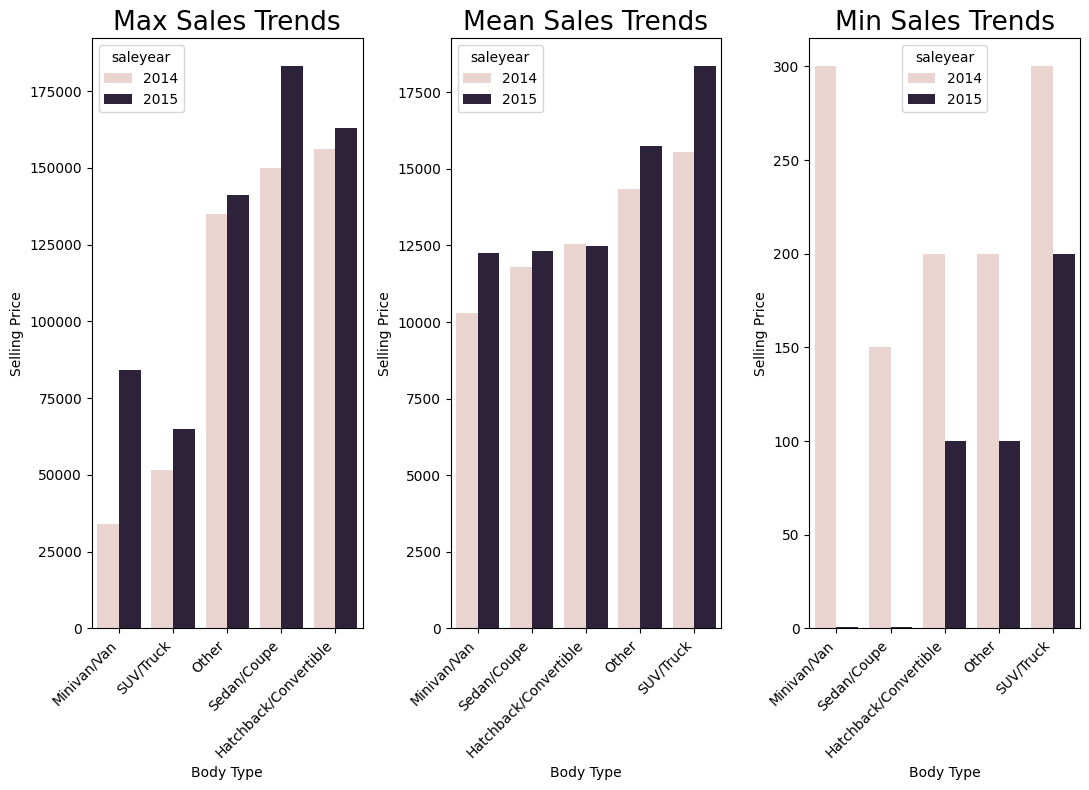

In [34]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 8))

# Plot mean sales trends
sns.barplot(x='body_cat', y='sellingprice', hue='saleyear', data=mean_sales_trends, ax=axes[1])
axes[1].set_title('Mean Sales Trends', fontsize=19)
axes[1].set_xlabel('Body Type')  # Corrected label
axes[1].set_ylabel('Selling Price')
#axes[0].axhline(y=100000, color='red', linestyle='dashed', linewidth=1)
# Rotate x-axis labels for all subplots efficiently
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')  # Right-aligned for better readability

# Plot max sales trends
sns.barplot(x='body_cat', y='sellingprice', hue='saleyear', data=max_sales_trends, ax=axes[0])
axes[0].set_title('Max Sales Trends', fontsize=19)
axes[0].set_xlabel('Body Type')
axes[0].set_ylabel('Selling Price')
#axes[1].axhline(y=100000, color='red', linestyle='dashed', linewidth=1)

# Plot min sales trends
sns.barplot(x='body_cat', y='sellingprice', hue='saleyear', data=min_sales_trends, ax=axes[2])
axes[2].set_title('Min Sales Trends', fontsize=19)
axes[2].set_xlabel('Body Type')
axes[2].set_ylabel('Selling Price')
#axes[2].axhline(y=100000, color='red', linestyle='dashed', linewidth=1)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

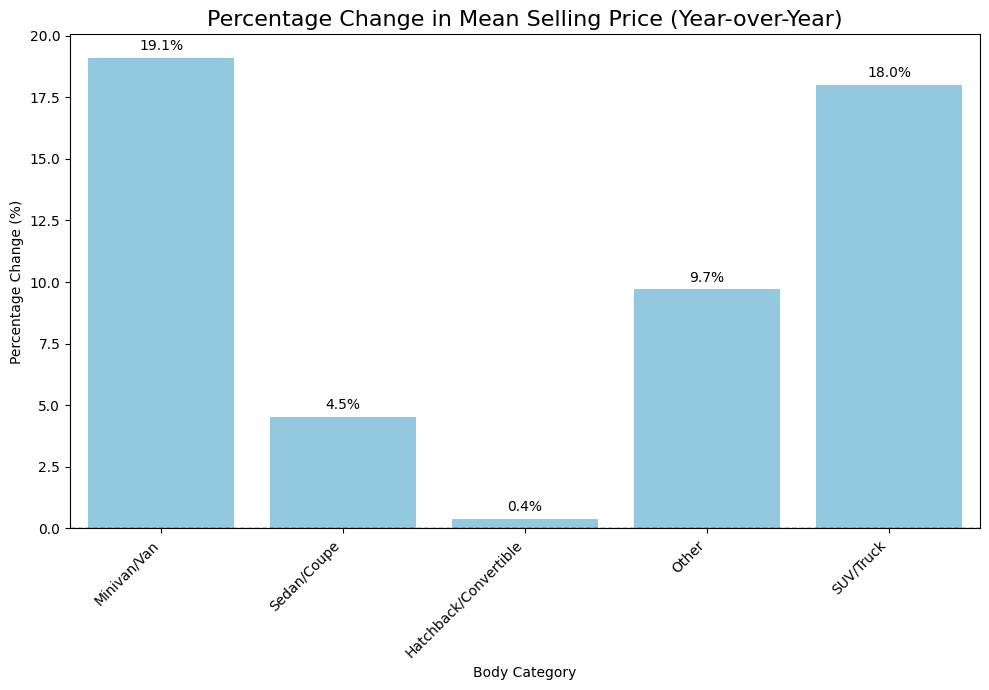

In [35]:
categories = ['Minivan/Van','Sedan/Coupe', 'Minivan/Van', 'Sedan/Coupe', 'Hatchback/Convertible',
              'Hatchback/Convertible', 'Other', 'SUV/Truck', 'Other', 'SUV/Truck']

# Calculate percentage change between saleyears for each body category
percentage_change_df = mean_sales_trends.groupby('body_cat')['sellingprice'].diff(periods=1) / mean_sales_trends.groupby('body_cat')['sellingprice'].shift(periods=1) * 100

# Create a new figure for the percentage change plot
plt.figure(figsize=(10, 7))

# Align categories to the x-axis
ax = sns.barplot(x=categories,
            y=percentage_change_df.values,
            color='skyblue')

plt.title('Percentage Change in Mean Selling Price (Year-over-Year)', fontsize=16)
plt.xlabel('Body Category')
plt.ylabel('Percentage Change (%)')
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)  # Reference line for zero change

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show percentage on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.3, '{:.1f}%'.format(height), ha='center')

plt.tight_layout()
plt.show()

## **2. Analyzing the Impact of Vehicle Condition and Mileage on Selling Prices**

### **Research Questions:**
* How does vehicle condition affect selling price for different car body types?
* What is the relationship between mileage and selling price for vehicles of the same age and make?
* Is there an interaction effect between vehicle condition and mileage on selling price?


### **How does vehicle condition affect selling price for different car body types?**

Correlation between condition and sellingprice: 0.31448004338091773



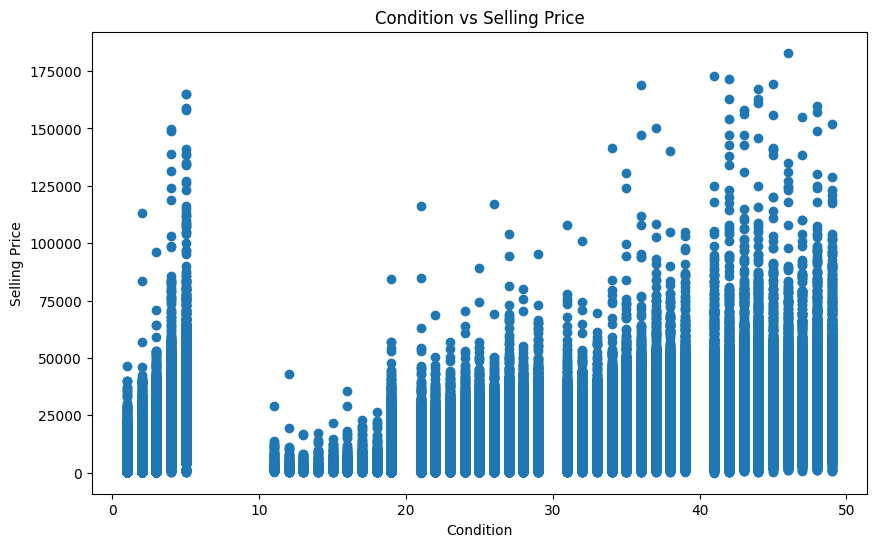

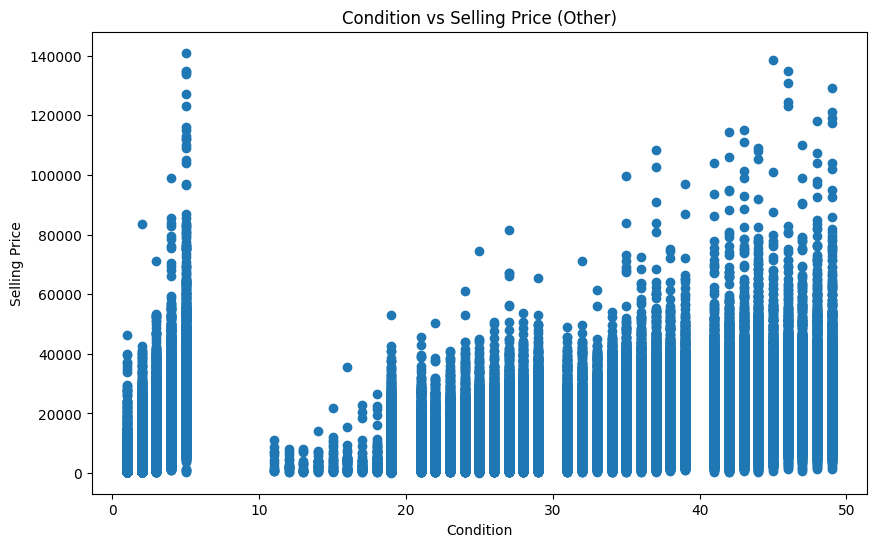

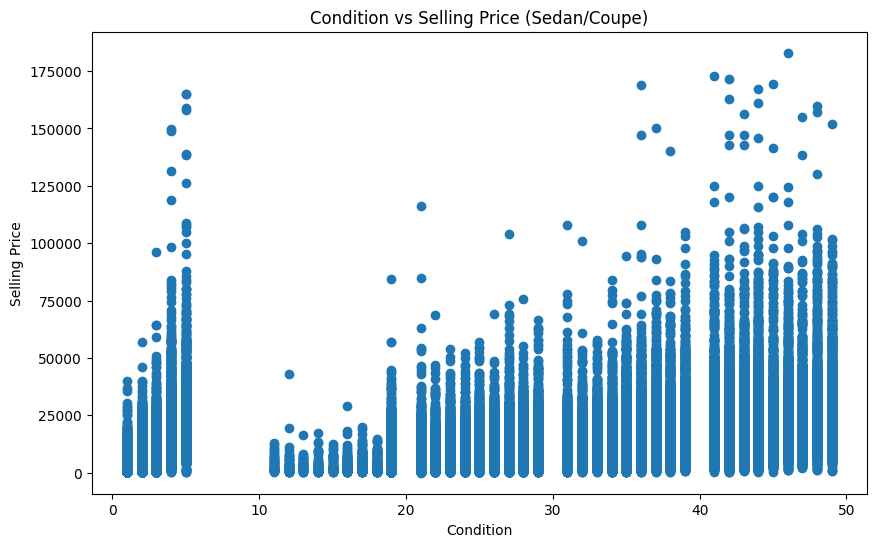

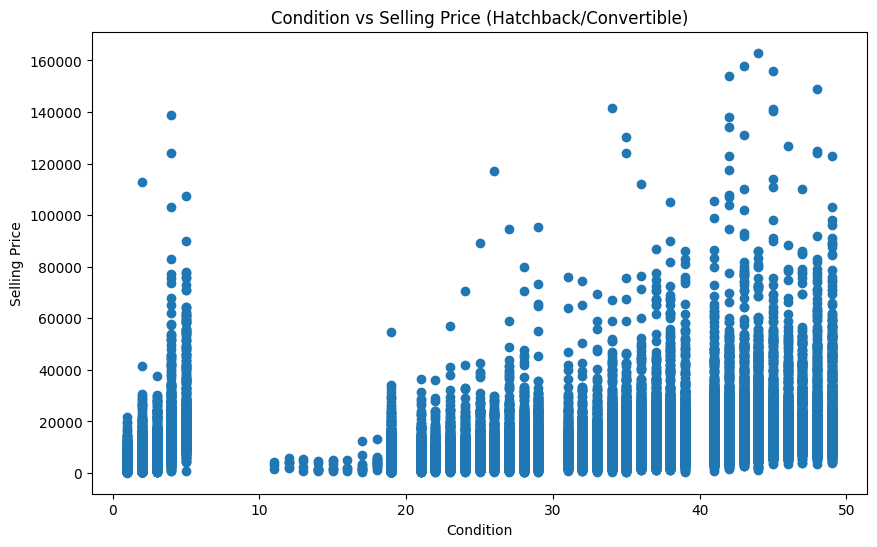

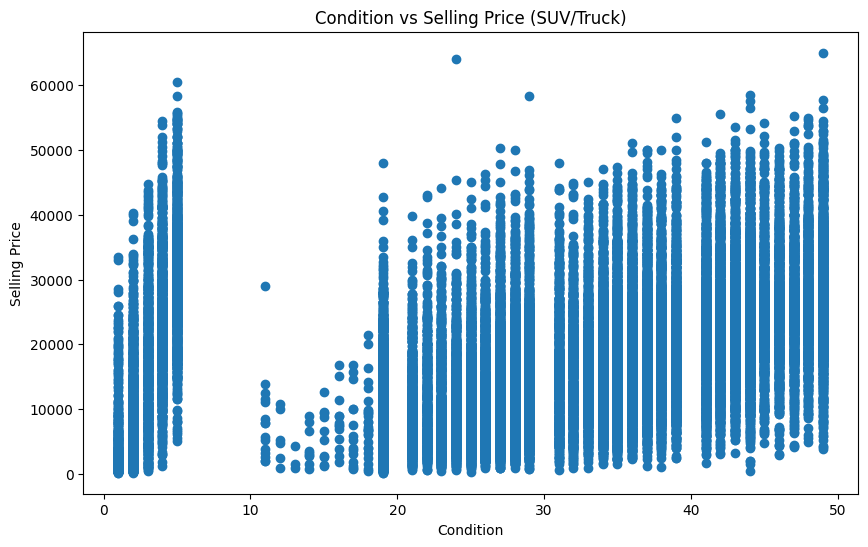

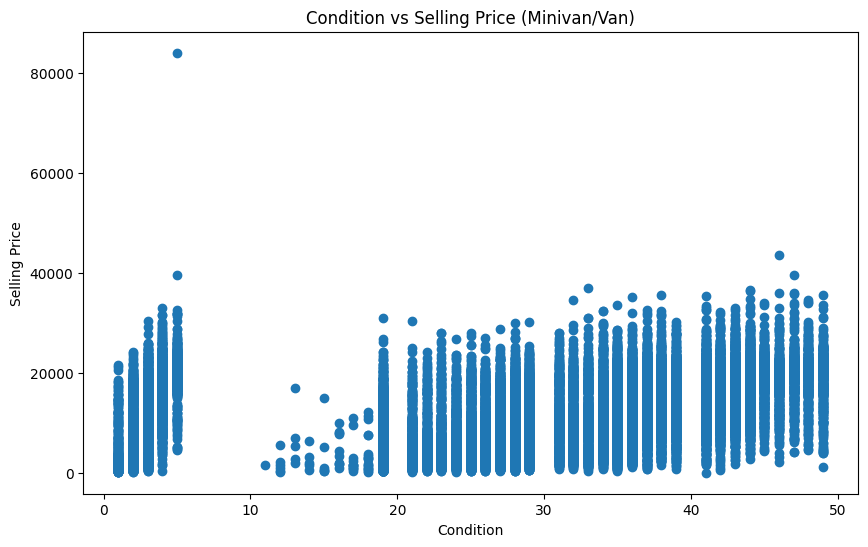

In [36]:
# Confirming the conditions variable

# Calculate correlation
correlation = filtered_df['condition'].corr(filtered_df['sellingprice'])
print(f"Correlation between condition and sellingprice: {correlation}\n")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['condition'], filtered_df['sellingprice'])
plt.xlabel("Condition")
plt.ylabel("Selling Price")
plt.title("Condition vs Selling Price")
plt.show()

# Scatter plot for each body category
for body_type in filtered_df['body_cat'].unique():
    subset = filtered_df[filtered_df['body_cat'] == body_type]
    plt.figure(figsize=(10, 6))
    plt.scatter(subset['condition'], subset['sellingprice'])
    plt.xlabel("Condition")
    plt.ylabel("Selling Price")
    plt.title(f"Condition vs Selling Price ({body_type})")
    plt.show()

Correlation between condition and odometer: -0.313013923047116



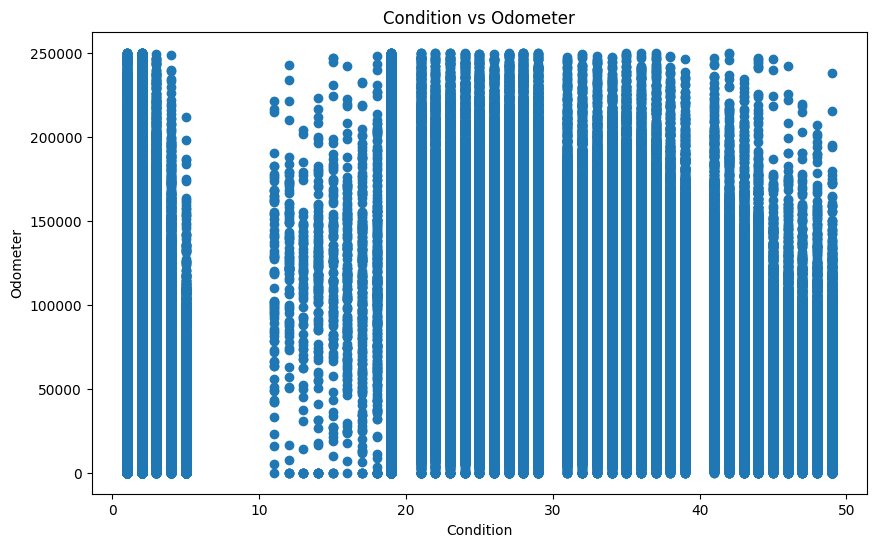

In [37]:
# Now confirming the relationship between condition and odometer to confirm condition

# Calculate correlation
correlation = filtered_df['condition'].corr(filtered_df['odometer'])
print(f"Correlation between condition and odometer: {correlation}\n")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['condition'], filtered_df['odometer'])
plt.xlabel("Condition")
plt.ylabel("Odometer")
plt.title("Condition vs Odometer")
plt.show()

In [38]:
# Vehichle condition vs selling price
# Based on the eariler findings higher condition is good/lower bad/Condition values (1 to 49)

mean_sales_trends = filtered_df.groupby(['condition', 'body_cat'])['sellingprice'].mean().sort_values(ascending=False).head(10).reset_index()
min_sales_trends = filtered_df.groupby(['condition', 'body_cat'])['sellingprice'].min().sort_values(ascending=False).head(10).reset_index()
max_sales_trends = filtered_df.groupby(['condition', 'body_cat'])['sellingprice'].max().sort_values(ascending=False).head(10).reset_index()

print(f'Max Sales Trends: Condition {max_sales_trends}\n')
print(f'Mean Sales Trends: Condition {mean_sales_trends}\n')
print(f'Min Sales Trends: Condition {min_sales_trends}\n')

Max Sales Trends: Condition    condition               body_cat  sellingprice
0      46.00            Sedan/Coupe     183000.00
1      41.00            Sedan/Coupe     173000.00
2      42.00            Sedan/Coupe     171500.00
3      45.00            Sedan/Coupe     169500.00
4      36.00            Sedan/Coupe     169000.00
5      44.00            Sedan/Coupe     167000.00
6       5.00            Sedan/Coupe     165000.00
7      44.00  Hatchback/Convertible     163000.00
8      48.00            Sedan/Coupe     160000.00
9      43.00  Hatchback/Convertible     158000.00

Mean Sales Trends: Condition    condition   body_cat  sellingprice
0       5.00  SUV/Truck      29808.56
1      49.00  SUV/Truck      27779.28
2      48.00  SUV/Truck      26971.31
3      46.00  SUV/Truck      26243.07
4       5.00      Other      26150.19
5      47.00  SUV/Truck      25996.25
6      45.00  SUV/Truck      25338.04
7      44.00  SUV/Truck      24780.79
8      43.00  SUV/Truck      24236.88
9       4.00

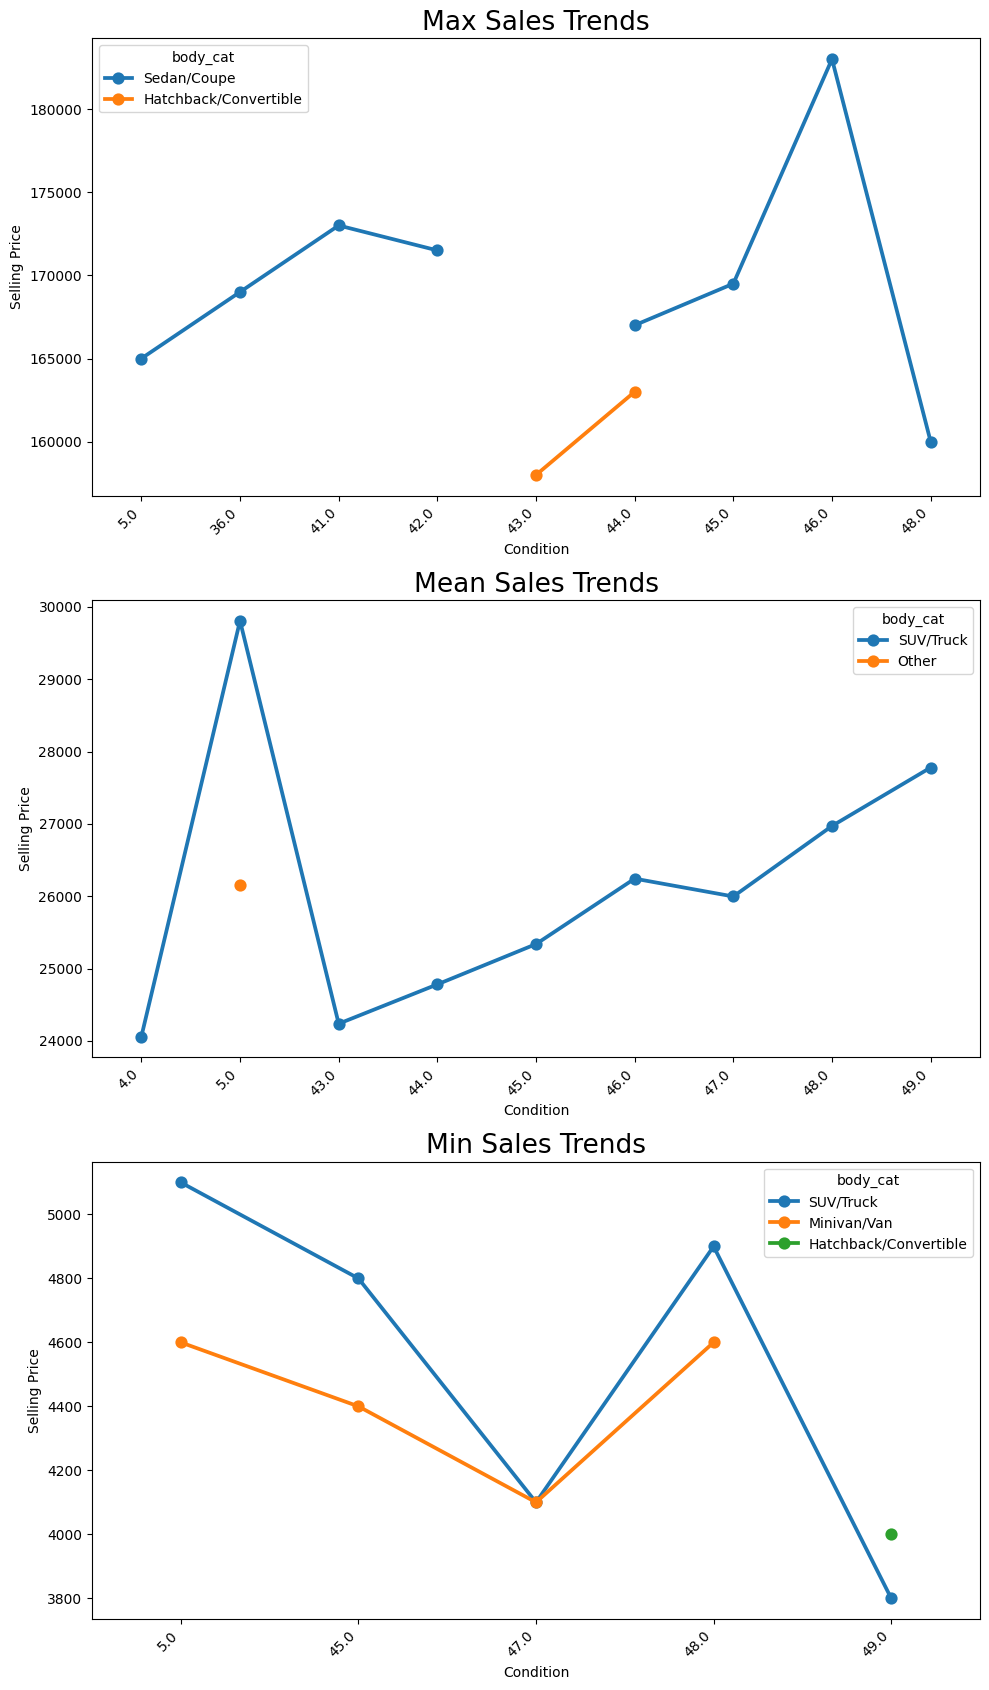

In [39]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 17))

# Plot max sales trends
sns.pointplot(x='condition', y='sellingprice', hue='body_cat', data=max_sales_trends, ax=axes[0])
axes[0].set_title('Max Sales Trends', fontsize=19)
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Selling Price')
#axes[1].axhline(y=100000, color='red', linestyle='dashed', linewidth=1

# Rotate x-axis labels for all subplots efficiently
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')  # Right-aligned for better readability

# Plot mean sales trends
sns.pointplot(x='condition', y='sellingprice', hue='body_cat', data=mean_sales_trends, ax=axes[1])
axes[1].set_title('Mean Sales Trends', fontsize=19)
axes[1].set_xlabel('Condition')  # Corrected label
axes[1].set_ylabel('Selling Price')
#axes[0].axhline(y=100000, color='red', linestyle='dashed', linewidth=1)

# Plot min sales trends
sns.pointplot(x='condition', y='sellingprice', hue='body_cat', data=min_sales_trends, ax=axes[2])
axes[2].set_title('Min Sales Trends', fontsize=19)
axes[2].set_xlabel('Condition')
axes[2].set_ylabel('Selling Price')
#axes[2].axhline(y=100000, color='red', linestyle='dashed', linewidth=1)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### **What is the relationship between mileage and selling price for vehicles of the same year?**



In [40]:
# Grouping by Year, Odometer (Mileage), and Selling Price

# Calculate correlation
correlation = filtered_df['odometer'].corr(filtered_df['sellingprice'])
print(f"Correlation between odometer and sellingprice: {correlation}\n")

mean_sales_trends = filtered_df.groupby(['year', 'odometer'])['sellingprice'].mean().sort_values(ascending=False).reset_index()
min_sales_trends = filtered_df.groupby(['year', 'odometer'])['sellingprice'].min().sort_values(ascending=False).reset_index()
max_sales_trends = filtered_df.groupby(['year', 'odometer'])['sellingprice'].max().sort_values(ascending=False).reset_index()

print(f'Mean Sales Trends: Odometer {mean_sales_trends}\n')
print(f'Min Sales Trends: Odometer {min_sales_trends}\n')
print(f'Max Sales Trends: Odometer {max_sales_trends}\n')

Correlation between odometer and sellingprice: -0.5925006257200552

Mean Sales Trends: Odometer         year  odometer  sellingprice
0       2011  12116.00     183000.00
1       2015   5277.00     173000.00
2       2013   7852.00     171500.00
3       2012  14316.00     169500.00
4       2012  11832.00     169000.00
...      ...       ...           ...
335491  1997 226034.00        100.00
335492  1995 198766.00        100.00
335493  2004 106495.00        100.00
335494  2002 145161.00        100.00
335495  2014  31886.00          1.00

[335496 rows x 3 columns]

Min Sales Trends: Odometer         year  odometer  sellingprice
0       2011  12116.00     183000.00
1       2015   5277.00     173000.00
2       2013   7852.00     171500.00
3       2012  14316.00     169500.00
4       2012  11832.00     169000.00
...      ...       ...           ...
335491  2003 215987.00        100.00
335492  2006  75389.00        100.00
335493  2008  90335.00        100.00
335494  2003      1.00          1.0

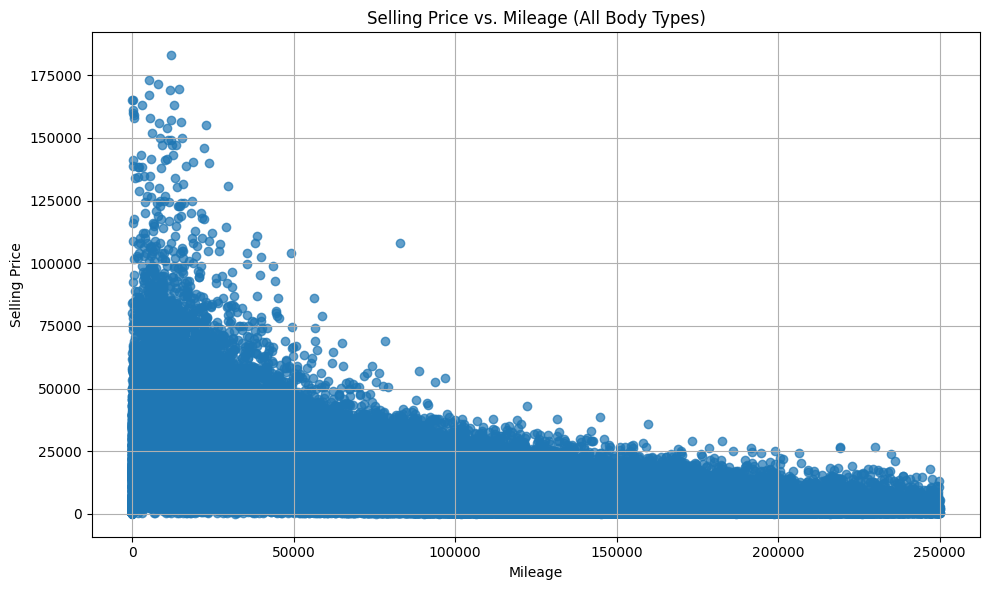

In [62]:
# Plotting the relationship between Odometer(Mileage) and Selling Price

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(filtered_df['odometer'], filtered_df['sellingprice'], alpha=0.7)  # Adjust alpha for transparency

plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Mileage (All Body Types)')

plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust spacing between elements
plt.show()

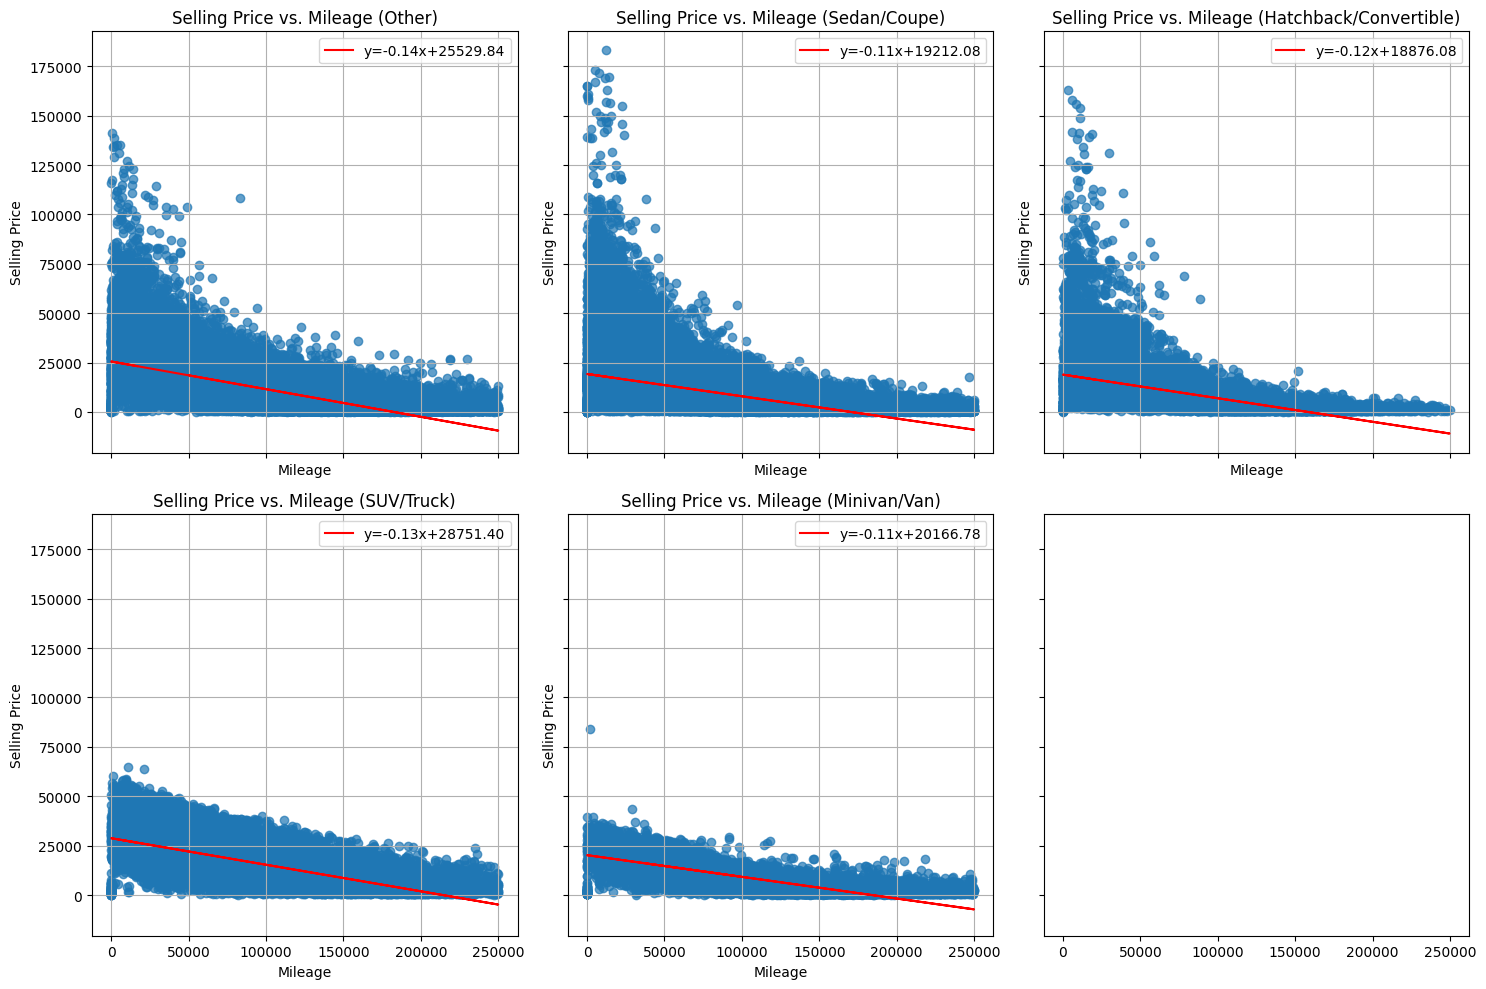

In [60]:
from scipy import stats # Import stats library for linear regression

# Get unique body categories
unique_body_cats = filtered_df['body_cat'].unique()

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=True, sharey=True)

# Loop through body categories and create scatter plots
for i, body_cat in enumerate(unique_body_cats):
    body_df = filtered_df[filtered_df['body_cat'] == body_cat]

    ax = axes.flat[i]

    ax.scatter(body_df['odometer'], body_df['sellingprice'], alpha=0.7)

    slope, intercept, r_value, p_value, std_err = stats.linregress(body_df['odometer'], body_df['sellingprice'])

    x = body_df['odometer']
    y_fitted = slope * x + intercept

    ax.plot(x, y_fitted, color='red', label=f'y={slope:.2f}x+{intercept:.2f}')
    ax.legend()

    ax.set_xlabel('Mileage')
    ax.set_ylabel('Selling Price')
    ax.set_title(f'Selling Price vs. Mileage ({body_cat})')

    ax.grid(True)

plt.tight_layout()
plt.show()

### **Is there an interaction effect between vehicle condition and mileage on selling price?**






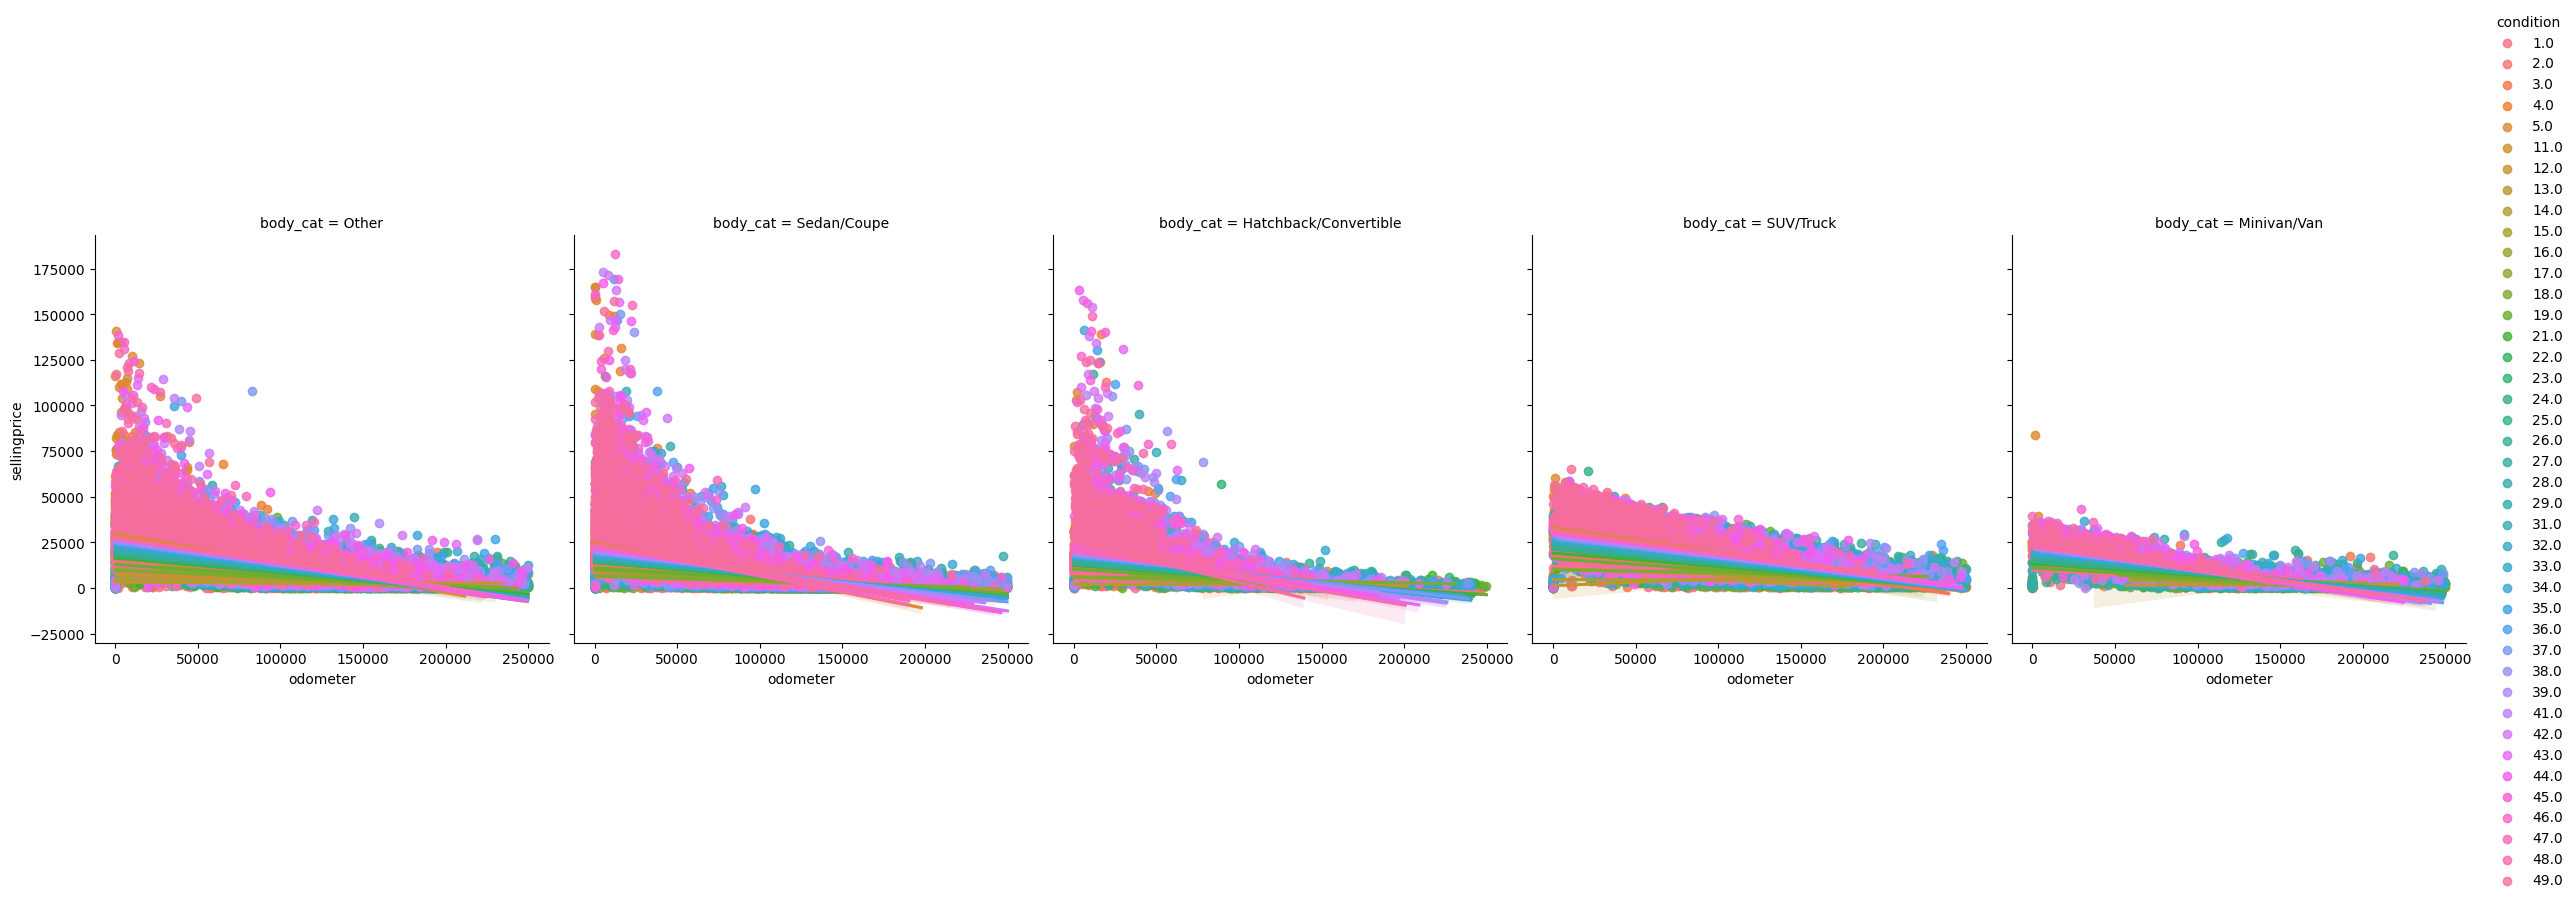

In [43]:
# Using lmplot we can evaluate the interactive relationship between condition and mileage, and its effect on selling price
# Based on the graphs below we see that the negative correlation, non-parallel and crossing lines, as well as, differential patterns indicate an interactive effect at varying degrees based on body type.

# Create a scatter plot using Seaborn
sns.lmplot(x='odometer', y='sellingprice', hue='condition', data=filtered_df, col='body_cat')
plt.show()

## **3. Understanding the Relationship Between MMR Values and Actual Selling Prices**

### **Research Questions:**
  * What is the correlation between MMR values and actual selling prices for different vehicle makes?
  * How does the difference between MMR values and selling prices vary across different vehicle ages or conditions?
  * Are there specific makes and models where MMR values consistently overestimate or underestimate selling prices?

### **What is the correlation between MMR values and actual selling prices for different vehicle makes?**

In [44]:
# Calculate correlation

correlation = filtered_df['mmr'].corr(filtered_df['sellingprice'])
print(f"Correlation between MMR values and sellingprice: {correlation}\n")

Correlation between MMR values and sellingprice: 0.9839273325282424



### **How does the difference between MMR values and selling prices vary across different vehicle years and conditions?**

In [45]:
# Create new feature for the difference between MMRs and Selling Price

filtered_df['mmr_diff'] = filtered_df['mmr'] - filtered_df['sellingprice']

In [46]:
# Group by vehicle year and condition, to calculate the avg MMR difference for each group

mmr_diff_by_year_cond = filtered_df.groupby(['year', 'condition'])['mmr_diff'].mean().reset_index()


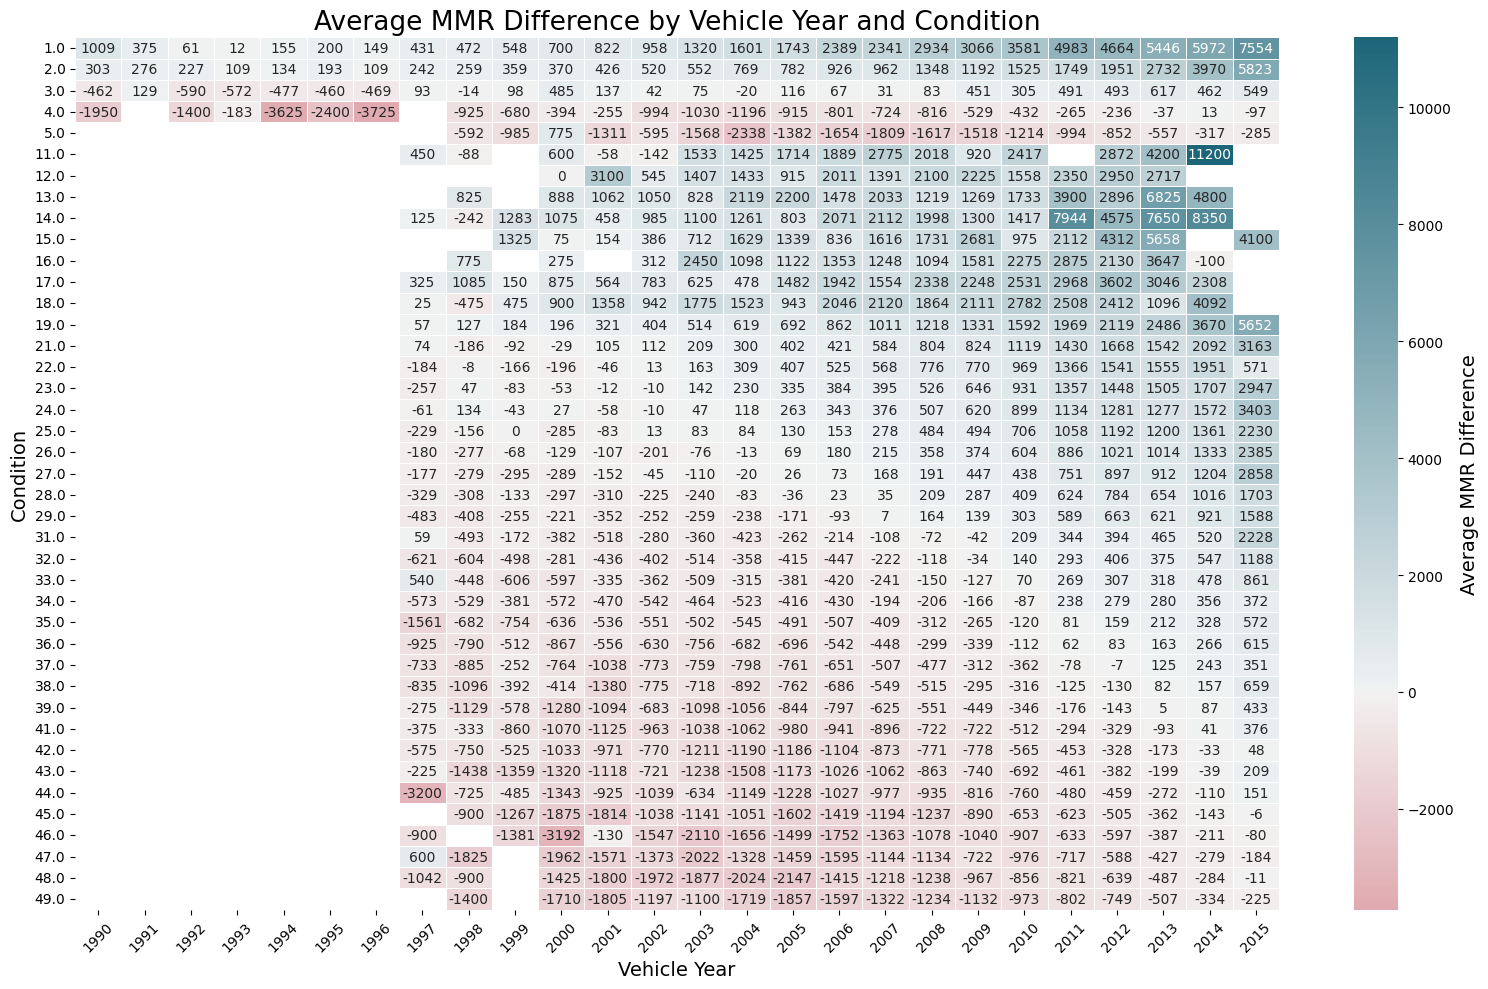

In [47]:
# Create the pivot table
pivot_table = mmr_diff_by_year_cond.pivot(index='condition', columns='year', values='mmr_diff')

# Define a custom colormap with darker colors
cmap = sns.diverging_palette(10, 220, s=90, l=40, as_cmap=True)

# Create the heatmap with the custom colormap
plt.figure(figsize=(16, 10))
ax = sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=cmap, center=0,
            annot_kws={"size": 10},
            linewidths=.5, cbar_kws={'label': 'Average MMR Difference'},
            linecolor='white')

# Increase fontsize of colorbar label
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Average MMR Difference', fontsize=14)

plt.title('Average MMR Difference by Vehicle Year and Condition', fontsize=19)
plt.xlabel('Vehicle Year', fontsize=14)
plt.ylabel('Condition', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Are there specific makes and models where MMR values consistently overestimate or underestimate selling prices?**

In [48]:
# Group by make and model, calculate average MMR difference
mmr_diff_by_make_model = filtered_df.groupby(['make', 'model'])['mmr_diff'].mean().reset_index()

# Identify makes and models where MMR consistently overestimates (positive mmr_diff)
overestimates = mmr_diff_by_make_model[mmr_diff_by_make_model['mmr_diff'] > 1000]

# Identify makes and models where MMR consistently underestimates (negative mmr_diff)
underestimates = mmr_diff_by_make_model[mmr_diff_by_make_model['mmr_diff'] < -1000]

# Function to color the DataFrame
def color_df(val):
    # Check if the value is numeric before comparison
    if isinstance(val, (int, float)):
        color = 'red' if val > 1000 else ('green' if val < -1000 else 'black')
    else:
        color = 'black' # Set default color for non-numeric values
    return f'color: {color}'

# Apply styling to overestimates
styled_overestimates = overestimates.style.applymap(color_df)

# Apply styling to underestimates
styled_underestimates = underestimates.style.applymap(color_df)

# Display the styled tables
print("Makes and models where MMR consistently overestimates:")
display(styled_overestimates)

print("\nMakes and models where MMR consistently underestimates:")
display(styled_underestimates)

Makes and models where MMR consistently overestimates:


<ipython-input-48-1ede38363160>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_overestimates = overestimates.style.applymap(color_df)
<ipython-input-48-1ede38363160>:23: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_underestimates = underestimates.style.applymap(color_df)


,make,model,mmr_diff
7,Acura,Rlx,1223.076923
28,Audi,R8,1664.062500
29,Audi,Rs 4,1733.333333
46,Bentley,Continental Gtc,3240.000000
48,Bentley,Continental Supersports,14000.000000
54,Bmw,4 Series Gran Coupe,1163.636364
63,Bmw,Activehybrid X6,2360.000000
64,Bmw,I8,6555.555556
70,Bmw,M6 Gran Coupe,2450.000000
101,Cadillac,Cts-V Coupe,1272.269231



Makes and models where MMR consistently underestimates:


,make,model,mmr_diff
14,Aston Martin,Db9,-2883.333333
15,Aston Martin,Rapide,-8250.000000
36,Audi,S7,-1664.285714
47,Bentley,Continental Gtc Speed,-2000.000000
61,Bmw,Activehybrid 5,-2825.000000
62,Bmw,Activehybrid 7,-2723.076923
68,Bmw,M5,-1031.465116
80,Bmw,Z4 M,-1340.000000
99,Cadillac,Cts Wagon,-1031.818182
102,Cadillac,Cts-V Wagon,-8200.000000



## **4. Determining the Most Popular Vehicle Makes and Models**

### **Research Questions:**
  * Which vehicle makes and models have the highest average selling prices, and how does this relate to their popularity?
  * Are there any emerging trends in the popularity of certain makes and models over recent years?

### **Which vehicle makes and models have the highest average selling prices, and how does this relate to their popularity?**

              make          model  avg_selling_price  sales_count
218        Ferrari     458 Italia          183000.00            1
538  Mercedes-Benz     Sls Amg Gt          156500.00            1
64             Bmw             I8          154222.22            9
650    Rolls-Royce          Ghost          153456.25           16
219        Ferrari     California          131846.15           13
..             ...            ...                ...          ...
610     Oldsmobile  Cutlass Ciera             358.33            6
133      Chevrolet        Corsica             350.00            1
269           Ford          Tempo             333.33            3
552        Mercury         Tracer             312.50            4
212          Dodge         Spirit             300.00            1

[770 rows x 4 columns]


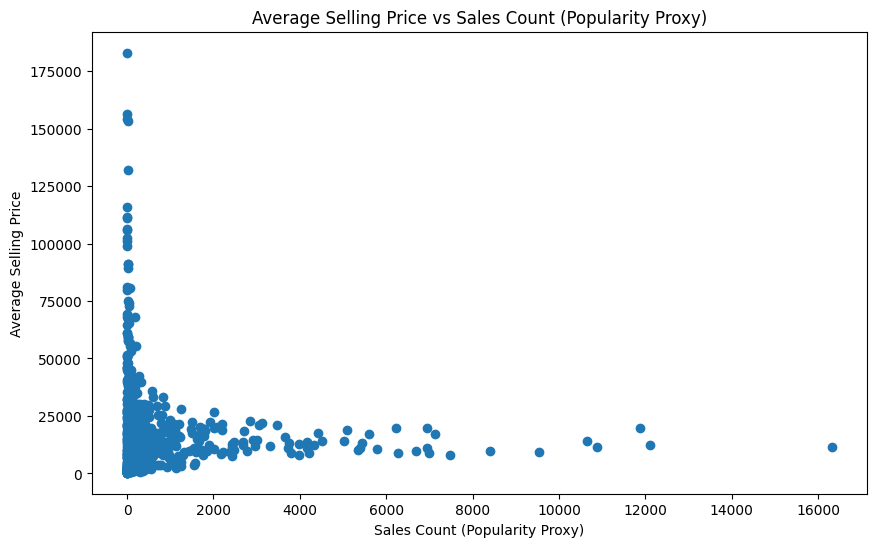

In [49]:
# Group by make and model, calculate average selling price and count sales
avg_selling_price = filtered_df.groupby(['make', 'model'])['sellingprice'].agg(['mean', 'count']).reset_index()
avg_selling_price.columns = ['make', 'model', 'avg_selling_price', 'sales_count']  # Rename columns

# Sort by average selling price in descending order
avg_selling_price_sorted = avg_selling_price.sort_values('avg_selling_price', ascending=False)

# Display the results
print(avg_selling_price_sorted)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(avg_selling_price_sorted['sales_count'], avg_selling_price_sorted['avg_selling_price'])
plt.title('Average Selling Price vs Sales Count (Popularity Proxy)')
plt.xlabel('Sales Count (Popularity Proxy)')
plt.ylabel('Average Selling Price')
plt.show()

### **Are there any emerging trends in the popularity of certain makes and models over recent years?**

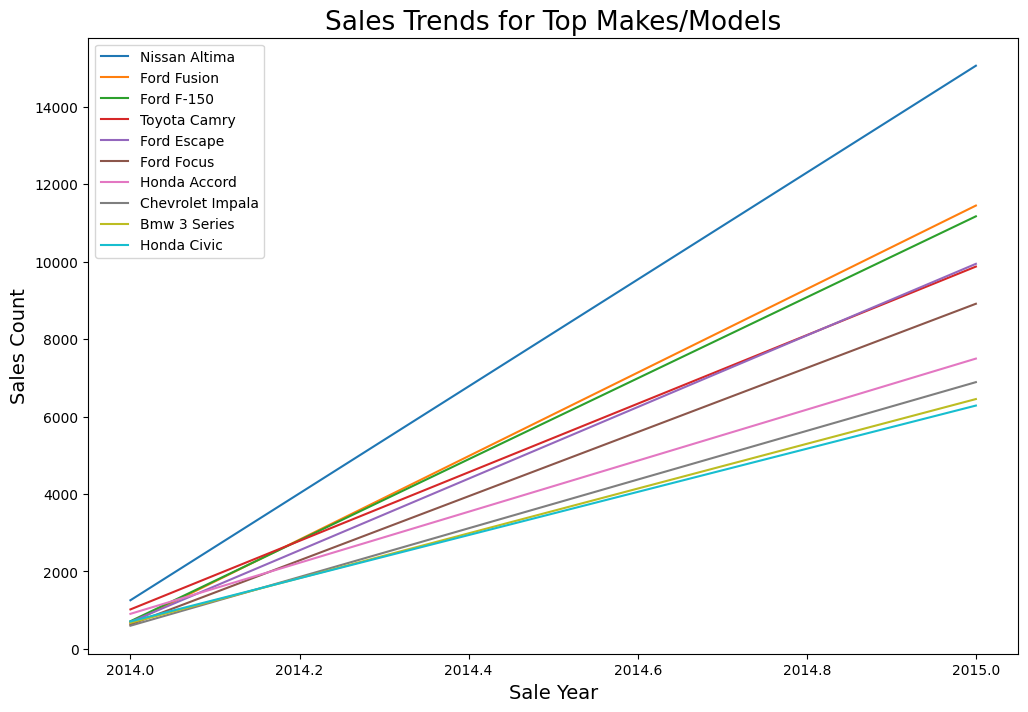

In [50]:
# Convert 'saledate' to datetime if it's not already
filtered_df['saledate'] = pd.to_datetime(filtered_df['saledate'])

# Group by make, model, and saleyear, and count sales
sales_by_year = filtered_df.groupby(['make', 'model', filtered_df['saledate'].dt.year])['vin'].count().reset_index()
sales_by_year.rename(columns={'vin': 'sales_count', 'saledate': 'saleyear'}, inplace=True)

# Find top N makes/models based on overall sales
top_n = 10  # Change this to the desired number of top makes/models
top_makes_models = sales_by_year.groupby(['make', 'model'])['sales_count'].sum().nlargest(top_n).index

# Filter sales data for top makes/models
top_sales = sales_by_year[sales_by_year[['make', 'model']].apply(tuple, axis=1).isin(top_makes_models)]

# Plot sales trends for top makes/models
plt.figure(figsize=(12, 8))
for make, model in top_makes_models:
    make_model_data = top_sales[(top_sales['make'] == make) & (top_sales['model'] == model)]
    plt.plot(make_model_data['saleyear'], make_model_data['sales_count'], label=f'{make} {model}')
plt.title('Sales Trends for Top Makes/Models', fontsize=19)
plt.xlabel('Sale Year', fontsize=14)
plt.ylabel('Sales Count', fontsize=14)
plt.legend()
plt.show()

# **Comprehensive Analysis:**

## **1. Identifying Trends in Vehicle Sales**

  * **Temporal Analysis:** Sales data analysis revealed a consistent upward trend across all listed models from 2014 to 2015, indicating a growing market.

  * **Visualization:** Time series plots confirmed the steady increase in sales over time.

## **2. Analyzing the Impact of Vehicle Condition and Mileage**

  * **Correlation Analysis:** Strong positive correlation between vehicle condition and selling price, while a generally negative correlation was observed between mileage and selling price.

  * **Regression Analysis:** Regression models confirmed the significant impact of condition and mileage on price.

  * **Visualization:** Scatter plots and regression lines illustrated the relationships between variables.

## **3. Understanding the Relationship Between MMR Values and Actual Selling Prices**

  * **Comparison Analysis:** MMR values were found to deviate from actual selling prices for certain makes and models.
  
  * **Error Analysis:** Discrepancies between MMR and actual prices were attributed to factors such as unique features, limited availability, and regional market dynamics.

## **4. Determining the Most Popular Vehicle Makes and Models**

  * **Market Share Analysis:** Ford vehicles dominated the **top 10**, followed by Toyota, Honda, and Nissan.

  * **Trend Analysis:** The popularity of certain models, such as the Toyota Camry and Ford F-150, remained consistent throughout the period.

## **Conclusion:**
  
  * **Vehicle condition** emerged as a critical factor influencing selling price, while **mileage** played a secondary role. The relationship between condition and price varied across body types. Popular makes and models included **Ford vehicles, the Toyota Camry, and Japanese brands.** MMR values were found to be inaccurate for certain vehicles, highlighting the need for a comprehensive analysis beyond MMR.

## **Recommendations:**

  * **Buyers:** Prioritize vehicles with high condition and low mileage to maximize value. Consider factors beyond MMR when evaluating prices.

  * **Sellers:** Accurately assess vehicle condition and adjust pricing strategies accordingly.

  * **Industry:** Conduct further research to improve the accuracy of MMR valuation models.

  * **Policymakers:** Implement policies that promote the sale of higher-condition vehicles and address factors that contribute to MMR inaccuracies.